<a href="https://colab.research.google.com/github/JoelForson/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 46720, 'Price_2024': 69289},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1600, 'Price_2024': 2200},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016': 4.99, 'Price_2024': 6.99}
]

In [18]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 48.31% Inflation
Rent (1 Bed): 37.50% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 40.08% Inflation


In [19]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='19333dfa76b436c7f74dfdbbd46a9676')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
spotify = fred.get_series('CUSR0000SERA02') # Added Spotify
chipotle = fred.get_series('CUSR0000SEFV') # Added Chipotle

In [20]:
sbdf = pd.DataFrame({'CPI': official_cpi, 'tuition': tuition, 'rent': rent, 'spotify': spotify, 'chipotle': chipotle })
sbdf = sbdf.dropna()
sbdf

,CPI,tuition,rent,spotify,chipotle
1992-01-01,138.300,200.700,145.400,180.800,139.800
1992-02-01,138.600,201.900,145.700,181.800,140.000
1992-03-01,139.100,203.500,146.500,183.300,140.100
1992-04-01,139.400,205.000,146.200,186.200,140.200
1992-05-01,139.700,206.300,146.500,185.200,140.400
...,...,...,...,...,...
2025-07-01,322.132,893.568,436.152,594.484,383.808
2025-08-01,323.364,895.305,437.462,592.604,384.909
2025-09-01,324.368,897.302,438.322,593.928,385.451
2025-11-01,325.031,902.001,438.875,599.226,387.202


In [21]:
sbdf = sbdf.loc['2016-01-01':]

print(f"Filtered data: {len(sbdf)} observations")
print(sbdf.head())

Filtered data: 119 observations
                CPI  tuition     rent  spotify  chipotle
2016-01-01  237.652  699.997  291.700  427.538   259.958
2016-02-01  237.336  701.688  292.617  430.633   260.319
2016-03-01  238.080  703.289  293.471  433.738   260.883
2016-04-01  238.992  704.842  294.397  435.570   261.517
2016-05-01  239.557  706.506  295.371  437.005   262.074


In [22]:
# GET 2016 BASELINE
baseline_2016 = sbdf.loc['2016'].iloc[0]

print("2016 BASELINE VALUES (Raw FRED Index)")
print("-"*40)
print(baseline_2016)


2016 BASELINE VALUES (Raw FRED Index)
----------------------------------------
CPI         237.652
tuition     699.997
rent        291.700
spotify     427.538
chipotle    259.958
Name: 2016-01-01 00:00:00, dtype: float64


In [23]:
#Adding normalization Logic
baseline = sbdf.loc['2016'].iloc[0]
baseline

,2016-01-01
CPI,237.652
tuition,699.997
rent,291.700
spotify,427.538
chipotle,259.958


In [24]:
value_index = (sbdf / baseline_2016) * 100

print("NORMALIZED DATA (2016 = 100)")
print("="*60)
print(value_index.head())

NORMALIZED DATA (2016 = 100)
                   CPI     tuition        rent     spotify    chipotle
2016-01-01  100.000000  100.000000  100.000000  100.000000  100.000000
2016-02-01   99.867032  100.241572  100.314364  100.723912  100.138869
2016-03-01  100.180095  100.470288  100.607131  101.450163  100.355827
2016-04-01  100.563850  100.692146  100.924580  101.878663  100.599712
2016-05-01  100.801592  100.929861  101.258485  102.214306  100.813978


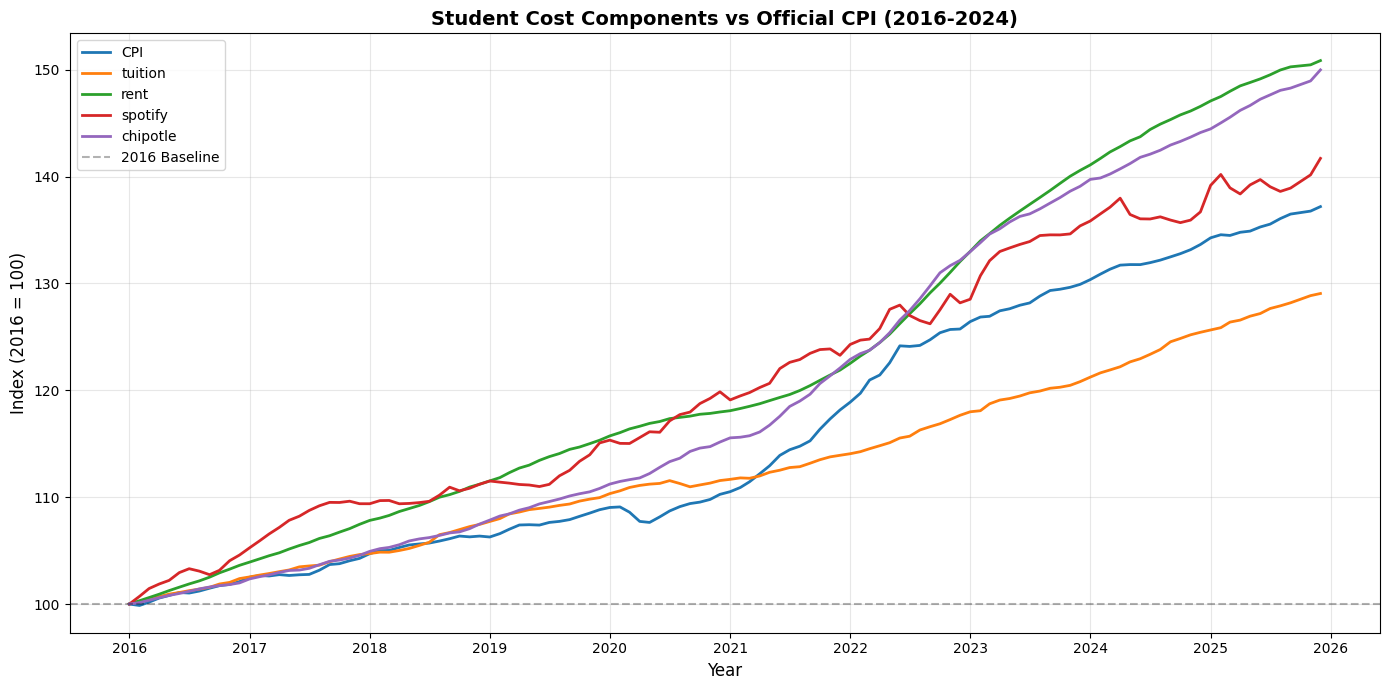

In [25]:
# Plot all normalized series
plt.figure(figsize=(14, 7))

for column in value_index.columns:
    plt.plot(value_index.index, value_index[column], label=column, linewidth=2)

plt.axhline(y=100, color='black', linestyle='--', alpha=0.3, label='2016 Baseline')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2016 = 100)', fontsize=12)
plt.title('Student Cost Components vs Official CPI (2016-2024)', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Define weights
weights = {
    'tuition': 0.35,      # 40% of student budget
    'rent': 0.30,         # 30%
    'chipotle': 0.25,    # 20%
    'spotify': 0.1     # 10%
}

# Calculate weighted average
value_index['Student_SPI'] = (
    value_index['tuition'] * weights['tuition'] +
    value_index['rent'] * weights['rent'] +
    value_index['chipotle'] * weights['chipotle'] +
    value_index['spotify'] * weights['spotify']
)
value_index

,CPI,tuition,rent,spotify,chipotle,Student_SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869,100.285968
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827,100.580713
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712,100.857419
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978,101.127922
...,...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,139.048225,147.642311,140.350214
2025-08-01,136.066181,127.901262,149.969832,138.608498,148.065841,140.633702
2025-09-01,136.488647,128.186549,150.264655,138.918178,148.274337,140.905091
2025-11-01,136.767627,128.857838,150.454234,140.157366,148.947907,141.489227


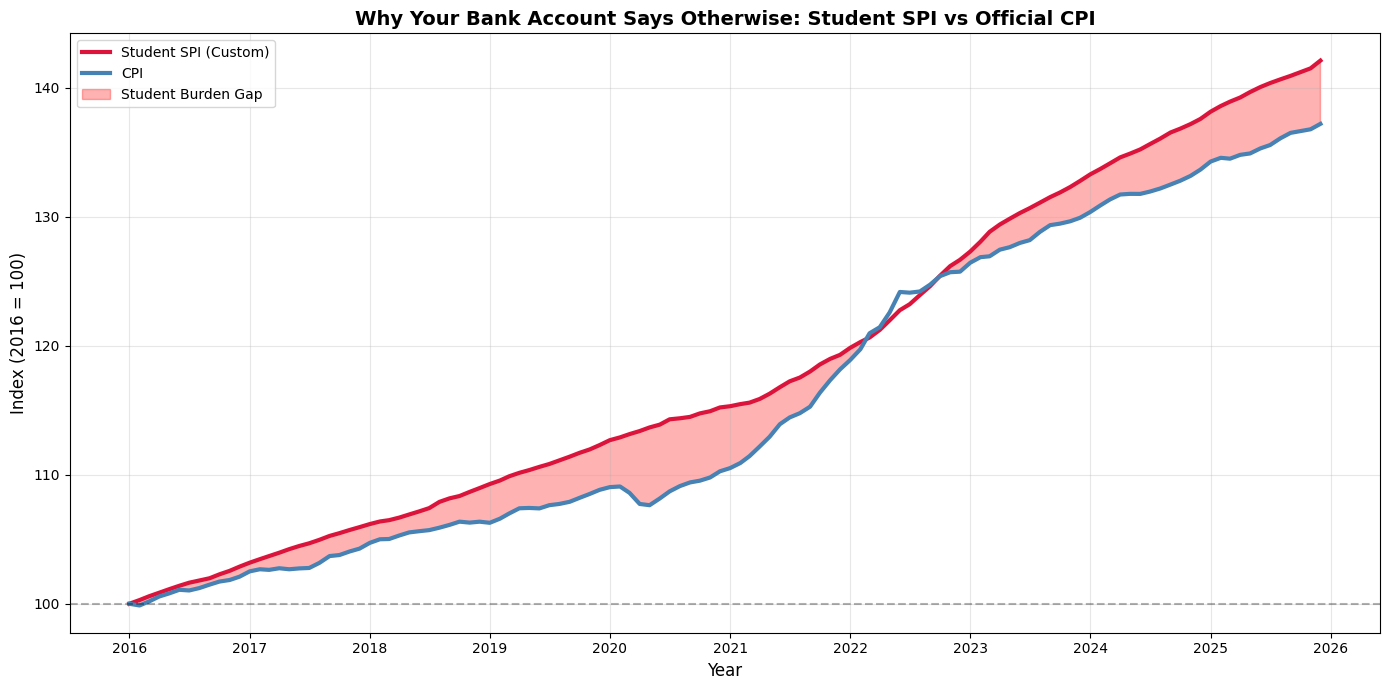


 Inflation gap: 4.90 percentage points
Student SPI says: 142.09
Official CPI says: 137.19


In [27]:
# Plot comparison
plt.figure(figsize=(14, 7))

plt.plot(value_index.index, value_index['Student_SPI'],
         label='Student SPI (Custom)', color='crimson', linewidth=3)
plt.plot(value_index.index, value_index['CPI'],
         label='CPI', color='steelblue', linewidth=3)

# Fill the gap
plt.fill_between(value_index.index,
                 value_index['Student_SPI'],
                 value_index['CPI'],
                 where=(value_index['Student_SPI'] > value_index['CPI']),
                 alpha=0.3, color='red', label='Student Burden Gap')

plt.axhline(y=100, color='black', linestyle='--', alpha=0.3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2016 = 100)', fontsize=12)
plt.title('Why Your Bank Account Says Otherwise: Student SPI vs Official CPI',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

final_gap = value_index['Student_SPI'].iloc[-1] - value_index['CPI'].iloc[-1]
print(f"\n Inflation gap: {final_gap:.2f} percentage points")
print(f"Student SPI says: {value_index['Student_SPI'].iloc[-1]:.2f}")
print(f"Official CPI says: {value_index['CPI'].iloc[-1]:.2f}")

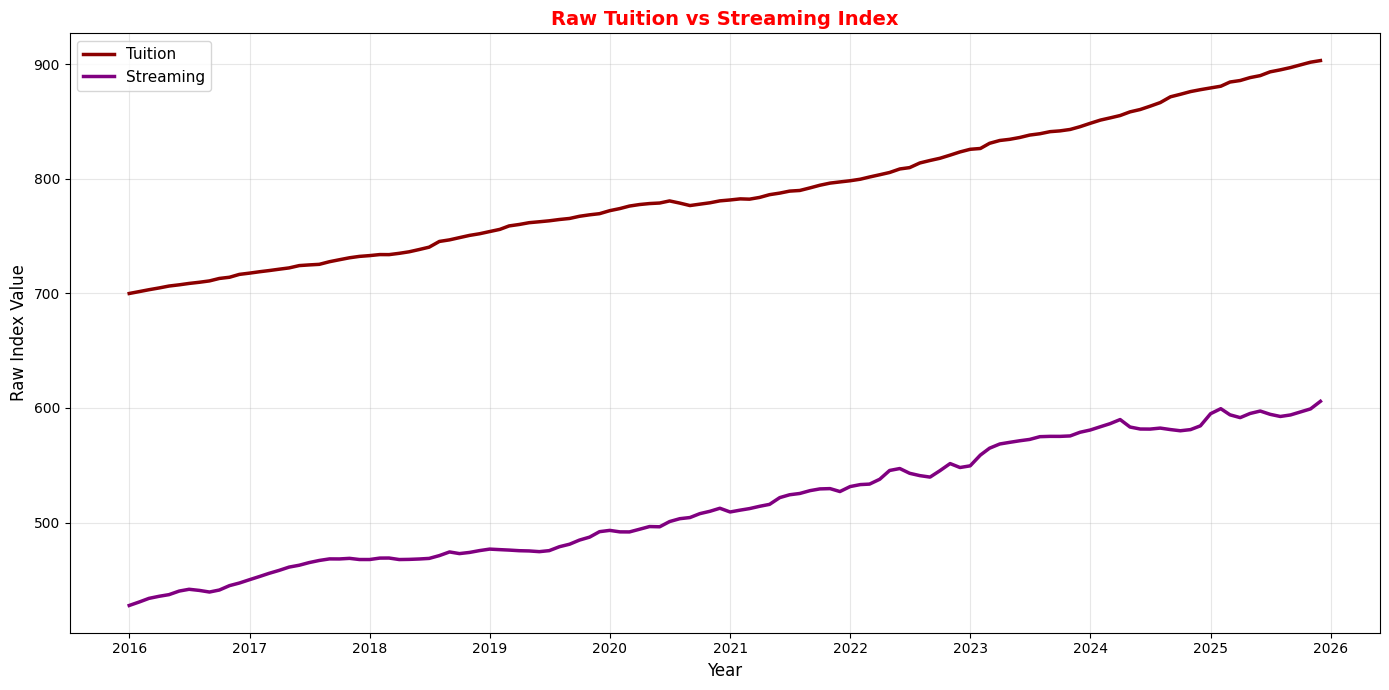

In [28]:
# Coding for Bad data for demonstration
import matplotlib.pyplot as plt

# Plot RAW data (before normalization)
plt.figure(figsize=(14, 7))

# Plot Tuition and Streaming on same axes
plt.plot(sbdf.index, sbdf['tuition'],
         label='Tuition',
         color='darkred', linewidth=2.5)

plt.plot(sbdf.index, sbdf['spotify'],
         label='Streaming',
         color='purple', linewidth=2.5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Raw Index Value', fontsize=12)
plt.title('Raw Tuition vs Streaming Index',
          fontsize=14, fontweight='bold', color='red')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Comparing raw indices with different base years is a bad practice because it compares incompatible measurements. When Tuition uses 1982 as its baseline and Streaming uses 1997, their index values are anchored to different starting points—like measuring distance with two rulers that have different zero marks. This creates a visual illusion in the example above where tuition appears 10x larger than streaming when the reality is that we're just seeing the effect of different base years, not actual relative costs or growth rates.

In [29]:
df = value_index[['CPI','Student_SPI']]

=== REGIONAL INFLATION DISPARITY SUMMARY ===

Latest Index Values:
National CPI: 137.19
Boston CPI: 135.25
Student SPI: 142.09

Boston Premium over National: -1.93 points
Student Burden vs National: 4.90 points


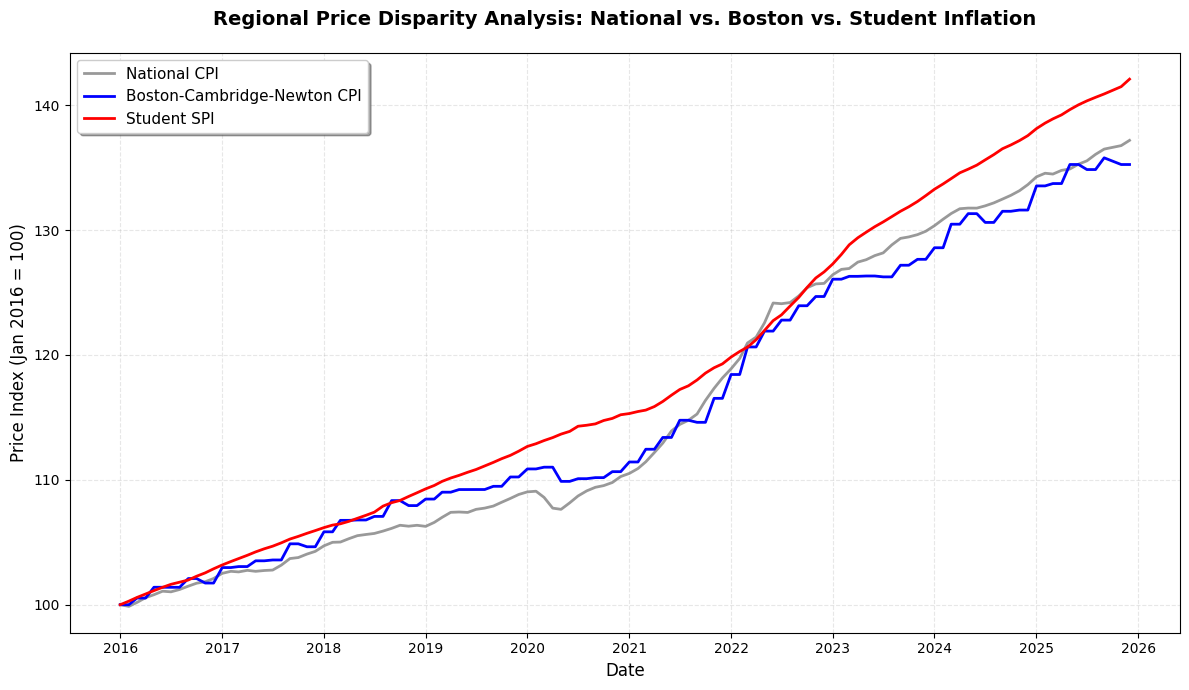

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (replace with your API key)
fred = Fred(api_key='19333dfa76b436c7f74dfdbbd46a9676')

# Fetch Boston CPI data
boston_cpi = fred.get_series('CUURA103SA0', observation_start='2016-01-01')
boston_cpi = boston_cpi.to_frame(name='Boston_CPI')

# Re-index Boston CPI so Jan 1, 2016 = 100
baseline_value = boston_cpi.loc['2016-01-01', 'Boston_CPI']
boston_cpi['Boston_CPI_Indexed'] = (boston_cpi['Boston_CPI'] / baseline_value) * 100

# Handle missing values using forward-fill (common for monthly/bimonthly data)
boston_cpi['Boston_CPI_Indexed'] = boston_cpi['Boston_CPI_Indexed'].ffill()

# Merge with your existing DataFrame
# Assuming df has a datetime index or date column matching the frequency
df = df.join(boston_cpi['Boston_CPI_Indexed'], how='left')

# Forward-fill any remaining gaps after the merge
df['Boston_CPI_Indexed'] = df['Boston_CPI_Indexed'].ffill()

# Create the comparative visualization
plt.figure(figsize=(12, 7))

# Plot all three series
plt.plot(df.index, df['CPI'],
         color='grey', linewidth=2, label='National CPI', alpha=0.8)
plt.plot(df.index, df['Boston_CPI_Indexed'],
         color='blue', linewidth=2, label='Boston-Cambridge-Newton CPI')
plt.plot(df.index, df['Student_SPI'],
         color='red', linewidth=2, label='Student SPI')

# Formatting
plt.title('Regional Price Disparity Analysis: National vs. Boston vs. Student Inflation',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Index (Jan 2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Display summary statistics
print("=== REGIONAL INFLATION DISPARITY SUMMARY ===")
print(f"\nLatest Index Values:")
print(f"National CPI: {df['CPI'].iloc[-1]:.2f}")
print(f"Boston CPI: {df['Boston_CPI_Indexed'].iloc[-1]:.2f}")
print(f"Student SPI: {df['Student_SPI'].iloc[-1]:.2f}")
print(f"\nBoston Premium over National: {(df['Boston_CPI_Indexed'].iloc[-1] - df['CPI'].iloc[-1]):.2f} points")
print(f"Student Burden vs National: {(df['Student_SPI'].iloc[-1] - df['CPI'].iloc[-1]):.2f} points")

plt.show()